# Nasdaq API Financial Data Analysis

In this brief project, we will highlight the importance of APIs in data analysis. Application Programming Interfaces (APIs) are commonly utilized in analysis to obtain streamlined and up-to-date data, as will be illustrated shortly. In this project, we will be using data from the Nasdaq Data Link API, focusing on the MER/F1 data table. This table contains comprehensive financial data from a set of companies, including balance sheets, cash flow statements, and income statements. Using this information, we will be able to understand their financial performance over time. We will also investigate and analyze how their financial values compare with each other and across different regions.

Our goals for this project are to demonstrate the usefulness of APIs in data analysis, while also using Python, Pandas, and Matplotlib. We will be performing some light analysis, while mainly focusing on the technical skills. These include using APIs, data retrieval, cleaning, and visualizing.

The two main questions we will be answering in this project are:

- How do the Accrued Expenses Turnover amounts from each company change and compare with each other over a certain period?
- How does the average Accrued Expenses Turnover amount from each country differ from that of other regions?

Let's begin by importing our libraries.

### Importing Libraries and Data

In [15]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

load_dotenv()

api_key = os.getenv("API_KEY")

We also imported the Operating System module (`os`) and `dotenv`, which is used to load our environment variable file (`.env`). TThe reason we use an environment file in this case is to protect the privacy of my API key. This method enables me to access the required data with my API key while safeguarding its security.

Next, we will retreive our data using the `requests` library. Once this is accomplished, we will extract the financial data in JSON format.

In [16]:
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

parameters = {
    'api_key': api_key,
    'qopts.per_page': 10000
}

json_data = requests.get(api_url, params=parameters).json()

With our data now in JSON format, we are ready to take the final steps toward our ultimate goal of accessing it through a pandas DataFrame. To accomplish this, we will extract the data and column names from the JSON variable. Then, we will use the extracted data and column names to construct a pandas DataFrame. Finally, to ensure that everything was successful, we will print out the first five rows of our new DataFrame and review the results.

### Data Exploration

In [17]:
data = json_data['datatable']['data']
column_names = [col['name'] for col in json_data['datatable']['columns']]

df_metric = pd.DataFrame(data, columns=column_names)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


In [18]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [19]:
df_metric.describe()

,compnumber,reportid,mapcode,amount,cik
count,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04
mean,68545.145900,1.644319e+09,-3669.044500,5.018704e+12,8.698509e+05
std,51580.054062,1.475896e+08,2101.671747,6.966402e+13,5.524387e+05
min,1409.000000,1.504051e+09,-9087.000000,-3.320227e+12,1.698800e+04
25%,12161.000000,1.543963e+09,-4524.000000,2.778785e+00,3.201930e+05
50%,99247.000000,1.581777e+09,-4023.000000,3.342475e+01,1.062781e+06
75%,111113.000000,1.623721e+09,-1766.000000,1.061628e+09,1.467373e+06
max,133772.000000,1.952498e+09,-873.000000,9.876500e+14,1.668717e+06


From the entries above, we can see that our dataset contains 32 columns and, due to our filtering of the JSON data, 10,000 rows. From the .describe() function, we also observe the statistical information for the columns that contain numeric data. This includes findings such as the maximum values, minimum values, and averages of each column. 

### Data Filtration

One of the key observations from the results above is that many columns are unnecessary for our data analysis. Since our analysis is focused on specific aspects of the financial data, we will remove all columns except those listed below to avoid unwanted complications.

Necessary Columns:
- 'reportid'
- 'reportdate'
- 'reporttype'
- 'amount'
- 'longname'
- 'country'
- 'region'
- 'indicator'
- 'statement'

In [20]:
necessary_columns = ['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement']
df_metric = df_metric[necessary_columns]

df_metric.head()

,reportid,reportdate,reporttype,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived


If you recall from the beginning of this project, the two main questions we are trying to answer in our analysis are:

- How do the Accrued Expenses Turnover amounts from each company change and compare with each other over a certain period?
- How does the average Accrued Expenses Turnover amount from each country differ from that of other regions?

The columns we retained above are necessary because our analysis only requires information about each company, country, time period, and financial report. The information in the other columns is not essential to our specific requirements. Likewise, for the rows, we only need those that contain ‘Accrued Expenses Turnover’ in the `indicator` column. This will ensure that we are only analyzing the ‘Accrued Expenses Turnover’ financial information.

In the code below, we will filter the rows of our dataset to include only those that are essential for our analysis.

In [21]:
filtered_df = df_metric[df_metric['indicator'] == 'Accrued Expenses Turnover']
filtered_df.head()

,reportid,reportdate,reporttype,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived


In [22]:
filtered_df['indicator'].describe()

count                           139
unique                            1
top       Accrued Expenses Turnover
freq                            139
Name: indicator, dtype: object

In [23]:
filtered_df['amount'].describe()

count    139.000000
mean      26.908762
std       33.097291
min        4.689773
25%        9.675670
50%       13.753753
75%       31.777614
max      229.810427
Name: amount, dtype: float64

### Accrued Expenses Turnover Interpretation

Above, we can see some valuable statistics about the `amount` column. From the indicator column, we also know that the amounts represent each company's ‘Accrued Expenses Turnover’ for that report. However, before we can make accurate interpretations of this information, we need to define what they are, what they tell us, and what constitutes a good Accrued Expense versus a bad one.

In simple terms, an Accrued Expense is an expense that the company has not yet paid. For example, they may have had some maintenance done but have not received the bill for the labor by the end of the month. They still need to include this expense on their financial statement for that month, even though they have not paid it yet, so it is categorized under Accrued Expenses. A higher Accrued Expense Turnover ratio indicates that a company is effectively managing its Accrued Expenses, meaning it is either paying off its debts quickly or generating sufficient revenue in relation to its accrued expenses. On the other hand, a lower ratio may indicate that the company is taking on more debt compared to its expenses or sales, which could point to possible cash flow problems or poor expense management. Cash flow issues occur when a business lacks enough cash to pay its bills, salaries, and other expenses.

Knowing all this, we can see that the minimum value in the `amount` column indicates a concerning financial situation for the company associated with that value. Conversely, the maximum value in the `amount` column represents a company with very successful finances and financial management.

### Country Clarification

Our next step is to add a column to our dataset to specify the country for each report. Currently, countries are identified by abbreviations, which makes it difficult to recognize some of them quickly.

In [24]:
def update_name(country):
    if country == 'USA':
        country='United States of America'
    elif country == 'DEU':
        country='Germany'
    elif country == 'JPN':
        country='Japan'
    elif country == 'CYM':
        country='Cayman Islands'
    elif country == 'BHS':
        country='Bahamas'
    elif country == 'IRL':
        country='Ireland'
    elif country == 'GBR':
        country='Great Britain'
    return country

filtered_df = filtered_df.copy()
filtered_df['country_name'] = filtered_df['country'].apply(update_name)
filtered_df.columns=['report_id','report_date','report_type',
                   'amount','company_name','country','region',
                   'indicator','statement','country_name']
updated_df=filtered_df.copy()
updated_df.head()

,report_id,report_date,report_type,amount,company_name,country,region,indicator,statement,country_name
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany


In [25]:
updated_df['country_name'].value_counts()

country_name
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
Great Britain                4
Name: count, dtype: int64

### Visualization by Company

In this next section of our project, we will be constructing two visualizations to answer the two questions we mentioned at the beginning of our project. As a reminder, these questions were:

- How do the Accrued Expenses Turnover amounts from each company change and compare with each other over a certain period?
- How does the average Accrued Expenses Turnover amount from each country differ from that of other regions?

For the first visualization, we need to filter our dataset to choose the columns that are relevant to our objectives. In this case, the columns we need are `company_name`, `report_date`, and `amount`. We will select these columns in the following code, place them in a new DataFrame, and convert the `report_date` column to the proper format.

In [26]:
# Convert 'report_date' to datetime and filter for 2010-2015
relevant_data = updated_df.copy()
necessary_columns = ['company_name', 'report_date', 'amount']
relevant_data = relevant_data[necessary_columns]
relevant_data['report_date'] = pd.to_datetime(relevant_data['report_date'])
relevant_data = relevant_data[(relevant_data['report_date'].dt.year >= 2010) & (relevant_data['report_date'].dt.year <= 2015)]
relevant_data.head(10)

,company_name,report_date,amount
0,Deutsche Bank AG,2011-06-30,10.481948
1,Deutsche Bank AG,2011-09-30,8.161754
2,Deutsche Bank AG,2012-06-30,10.788213
3,Deutsche Bank AG,2012-09-30,9.437545
4,Deutsche Bank AG,2013-06-30,8.755041
5,Deutsche Bank AG,2013-09-30,8.109493
876,Ultrapetrol (Bahamas) Ltd,2010-12-31,107.533831
894,Ultrapetrol (Bahamas) Ltd,2010-12-31,50.544778
940,Ultrapetrol (Bahamas) Ltd,2011-03-31,44.054407
978,Ultrapetrol (Bahamas) Ltd,2011-06-30,41.689381


Now that our data is prepared, we can proceed to generate the visualization. With the matplotlib library, we will create a line graph displaying the Accrued Expenses Turnover amounts for each company from 2010 to 2015.

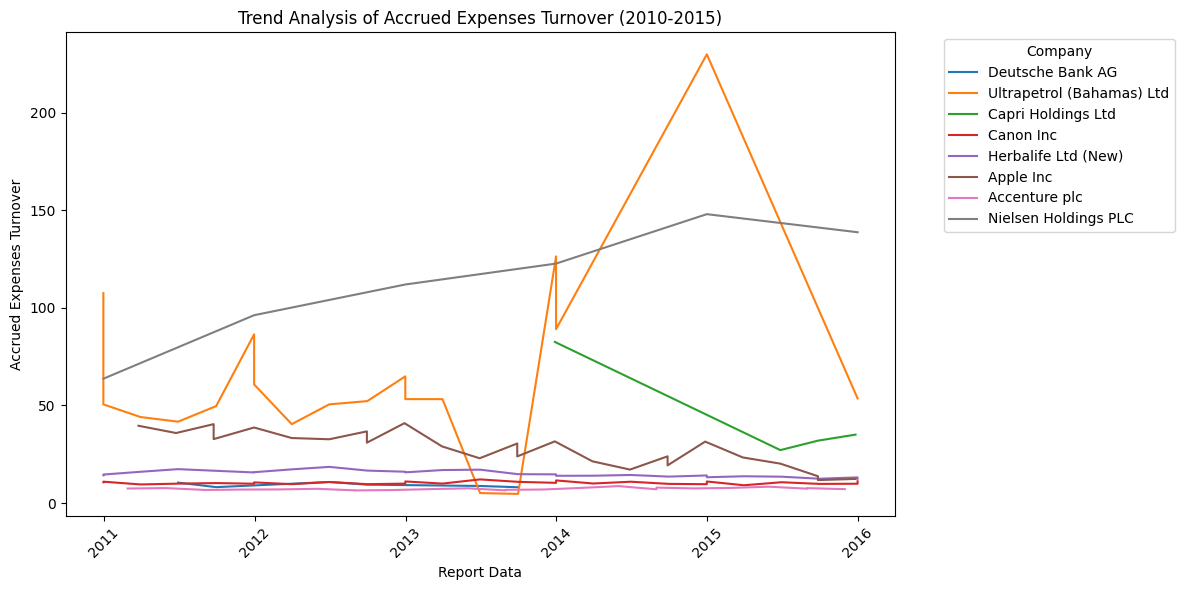

In [27]:
%matplotlib inline

plt.figure(figsize=(12, 6))

for company in relevant_data['company_name'].unique():
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], label=company)

plt.title('Trend Analysis of Accrued Expenses Turnover (2010-2015)')
plt.xlabel('Report Data')
plt.ylabel('Accrued Expenses Turnover')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Visualization Analysis

One of the first things we observe from the chart above is that the financial status of some companies changes gradually over time, while others exhibit erratic and inconsistent patterns. Specifically, Nielsen Holdings PLC's financial statements are gradually improving, while Ultrapetrol (Bahamas) Ltd's financial statements frequently change dramatically. Similarly, there are other companies that strike a balanced middle ground between the two we just discussed. Apple Inc. can be seen as a blend of the two companies we just mentioned; it experiences more fluctuations than Nielsen Holdings PLC, yet these changes are not as extreme as those of Ultrapetrol (Bahamas) Ltd. 

As we continue to analyze the other companies, we observe that four of them exhibit a consistent pattern of weak financial statements. Herbalife Ltd (New), Conon Inc., Accenture plc, and Deutsche Bank AG are positioned low on the graph, indicating low Accrued Expenses Turnover amounts. As we established in our earlier analysis, this suggests poor financial management or cash flow challenges. Finally, it appears that not all companies have reported data for the entire period covered in our limited dataset. Specifically, reports for both Capri Holdings Ltd and Deutsche Bank AG are available only for limited timeframes within the specified period.

### Visualization by Region

Having analyzed the Accrued Expenses Turnover amounts for each company, we will now focus on the average amounts by region or country. As with our previous visualization, we will create a tailored DataFrame to meet our objectives before generating the visualization.

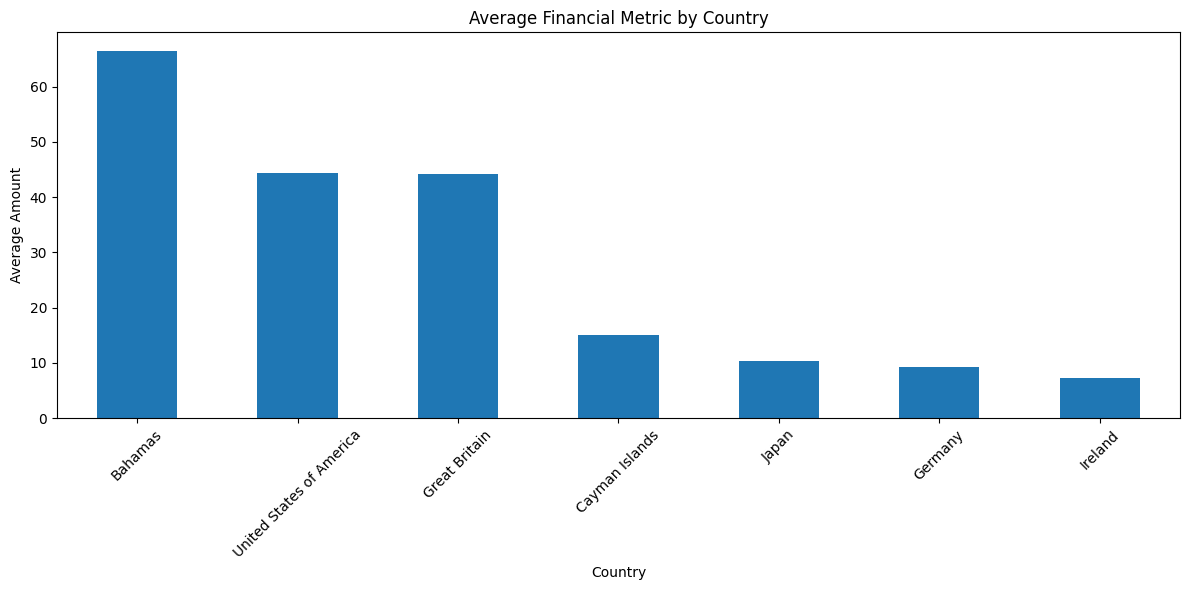

In [28]:
# Grouping data by country and calculating the average of the 'amount'
country_avg = updated_df.groupby('country_name')['amount'].mean()

plt.figure(figsize=(12, 6))
country_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Financial Metric by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization Analysis

One of the first things we notice from this bar graph is that the Bahamas region stands significantly apart from the rest. This is ironic, especially considering what we observed in the previous graph regarding Ultrapetrol (Bahamas) Ltd. We can now see that, even though Ultrapetrol (Bahamas) Ltd was quite inconsistent in its Accrued Expense Turnover ratio reports, it was still high enough on average to elevate its geographical region above all the other regions in the dataset.

Next, the second position on our bar graph is held by the United States and Great Britain, both of which have an average between 40 and 50. The last four regions are significantly lower than the others, with their averages ranging between 0 and 20. In summary, our analysis of each region reveals that the Bahamas is financially thriving, particularly in terms of its Accrued Expenses. The United States and Great Britain are also performing well in this area, though they do not match the success of the Bahamas. Lastly, the final four regions—Cayman Islands, Japan, Germany, and Ireland—rank low on the average scale, suggesting potentially troubling Accrued Expenses or financial conditions.

### Conclusion

Throughout this project, we have seen how incredibly useful APIs can be when retrieving data. Let’s say a company is interested in moving to one of the regions we studied above. This data, easily accessed through APIs, would be valuable to that company, showing them the kind of competitive environment they would be entering in that region. This is just one example of how APIs can benefit many decisions we face, not just in the business world, but in general life as well. With up-to-date data from APIs, we can be much more informed and aware of the information needed to make all kinds of important decisions. As a result, the outcomes of our decisions will be much more accurate and, hopefully, very successful in the long run due to the extra effort we put into the back end!